# NLP and Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Loading Data 
df=pd.read_csv('blogs.csv')
# Primary inspection
df.head()
df.info()
df.describe()
df.isnull().sum()
df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


,Data,Labels


In [3]:
# Data Preprocessing
def preprocess_txt(text):
    # Converting text into lower case
    text = text.lower()
    # removing special characters from text
    text = re.sub(f'[{string.punctuation}]','',text)
    # Spliting text into small words (tokens)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)
# Creating Column and applying data preprocessed fn to Raw Data
df['preprocessed']=df['Data'].apply(preprocess_txt)

In [4]:
# Feature Extraction
# Creating TF-IDF 
vectorizer = TfidfVectorizer()
X_arr=vectorizer.fit_transform(df['preprocessed'])
# Dividing Features as X and Labels into Y
X=pd.DataFrame(X_arr.toarray(),columns=vectorizer.get_feature_names_out())
y=df['Labels']

In [5]:
# Spleting into train test segments
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Formulating Model
from sklearn.naive_bayes import MultinomialNB
nbmodel=MultinomialNB()
# Train the model with Training X and Y values
nbmodel.fit(X_train,y_train)

MultinomialNB()

In [6]:
# Predecting Label with X _test
ypred=nbmodel.predict(X_test)
# Evaluating Metrics for tested data
from sklearn.metrics import accuracy_score,f1_score,classification_report
print(classification_report(y_test,ypred))
print(f'Accuracy of Test Part is : {accuracy_score(y_test,ypred):.2f}')

                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0.91        17
         

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

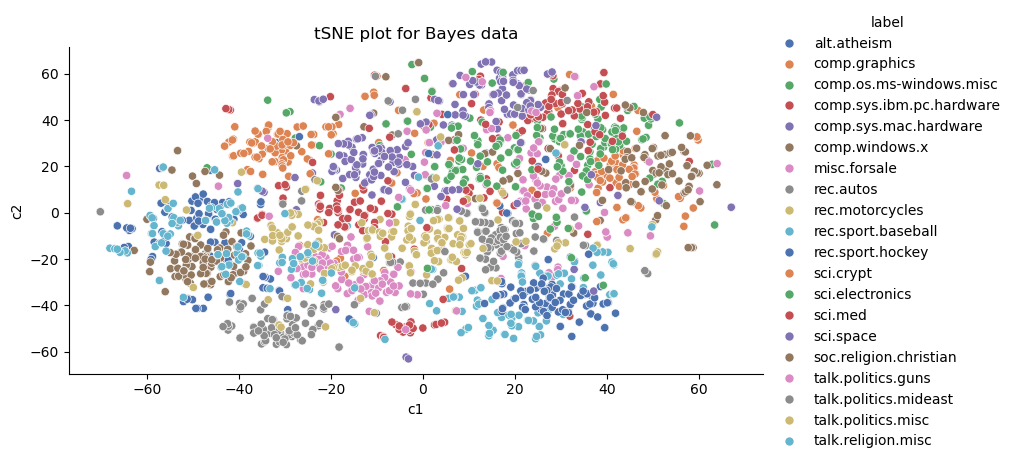

In [9]:
# Building TSNE model for Visualization 
from sklearn.manifold import TSNE
tsne=TSNE(init='random')
arr=tsne.fit_transform(X_arr)
dff=pd.DataFrame(arr,columns=['c1','c2'])
dff['label']=df['Labels']
# Ploting scatter plot for checking dispersion of data
sns.relplot(dff,x='c1',y='c2',kind='scatter',hue='label',palette='deep',height=4,aspect=2)
plt.title('tSNE plot for Bayes data')
plt.show()

In [10]:
# Sentimental Analysis
def get_sentiment_(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
# applying sentimenta analysis fn data
df['sentiment']=df['Data'].apply(get_sentiment_)

In [12]:
df['sentiment'].value_counts()

Positive    1543
Negative     457
Name: sentiment, dtype: int64

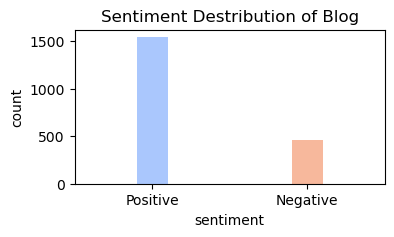

In [14]:
# Ploting Result of Sentimental Data
plt.figure(figsize=(4,2))
sns.countplot(data=df,x='sentiment',palette='coolwarm',hue=df['sentiment'],width=0.2,saturation=1)
plt.title('Sentiment Destribution of Blog')
plt.show()

### Summary Report

    Naive Bayes:

        The Naive Bayes classifier performed with an overall accuracy of 82% , which is not bad and Some challenges include handling imbalanced data and potential misclassification due to similar word distributions among categories.As the data is more there is porne to noise in data observed in tSNE plot.Apart from this all it performed well.

    Sentimental Anlaysis:

        The sentiment analysis shows a distribution of positive, negative, and neutral sentiments.This can help in understanding how different blog categories express sentiment and whether there are predominant sentiment trends in certain categories.This data ('Blog') is regarding politics,technology,religion and also coverd some topics regarding windows os.How ever there are 77% of positive  in data ie.,(1543 posts) and 33% of data is considerd as negative.However,There may be some missclassification due to sarcasm, context-dependent meanings, and ambiguous words which is ignored for instance.This model performed well with more data
